## Хакатон, детальный взгляд на данные 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymorphy2
from collections import Counter
%matplotlib inline
import math

In [3]:
df = pd.read_csv('data_frame.csv', delimiter = ';')
df.head()
print(df['parsed'][0]), type(df['parsed'][0])

год работать устать лампочка гореть большой ничто


(None, str)

Попытаемся понять, что именно оказывает наибольшее влияние на формирование положительных и отрицательных отзывов. Для начала разделим выборку условно на две части: с хорошим рейтингом (4, 5) и с плохим (1, 2). 

In [5]:
neg = df[df.reting < 3]
pos = df[df.reting > 3]

In [6]:
list(neg['parsed'])[0].split(' ')[0]

'год'

In [7]:
pos = pos.dropna()

In [8]:
def top_words(data, n = 20): 
    al = []
    for a in data:
        for word in a.split():
            al.append(word)
    return Counter(al).most_common(n)

Выведем наиболее часто встречаемые слова для положительных отзывов (20 шутк)

In [10]:
top_words(pos['parsed'])

[('не', 16056),
 ('очень', 6405),
 ('но', 4831),
 ('это', 3557),
 ('купить', 3539),
 ('хороший', 3445),
 ('год', 3144),
 ('весь', 2795),
 ('работать', 2305),
 ('отличный', 2300),
 ('пользоваться', 2202),
 ('довольный', 2140),
 ('просто', 1972),
 ('нет', 1932),
 ('один', 1728),
 ('качество', 1710),
 ('цена', 1682),
 ('такой', 1645),
 ('большой', 1635),
 ('модель', 1503)]

То же самое проделаем и для негативных

In [11]:
top_words(neg['parsed'])

[('не', 3733),
 ('но', 824),
 ('купить', 782),
 ('год', 705),
 ('очень', 695),
 ('это', 650),
 ('работать', 442),
 ('месяц', 423),
 ('один', 402),
 ('такой', 356),
 ('хороший', 355),
 ('чайник', 324),
 ('нет', 316),
 ('покупать', 308),
 ('деньга', 304),
 ('весь', 295),
 ('день', 291),
 ('большой', 289),
 ('просто', 280),
 ('вода', 280)]

Как видим, конкретных отличительных особенностей в этих признаках нет. К примеру, слова "не", "очень", "но" гораздо более интерпретируемы в контексте, а слова "купить" или "деньга" вообще являются общеупотребительными.
Попробуем, в таком случае, построить биграммы и триграммы:

In [12]:
def top_collocations(data, n = 20):
    al = []
    for a in data:
        loc = a.strip().split(' ')
        for ii in range(len(loc) - 1):
            al.append((loc[ii], loc[ii+1]))
    return Counter(al).most_common(n)

In [13]:
top_collocations(pos['parsed'])

[(('очень', 'довольный'), 919),
 (('не', 'пожалеть'), 572),
 (('очень', 'хороший'), 434),
 (('но', 'это'), 432),
 (('ничто', 'не'), 388),
 (('цена', 'качество'), 388),
 (('не', 'очень'), 388),
 (('год', 'назад'), 377),
 (('это', 'не'), 368),
 (('весь', 'советовать'), 360),
 (('очень', 'удобный'), 357),
 (('но', 'не'), 345),
 (('не', 'мочь'), 304),
 (('пока', 'не'), 295),
 (('очень', 'понравиться'), 289),
 (('пользоваться', 'год'), 287),
 (('очень', 'удобно'), 284),
 (('месяц', 'назад'), 270),
 (('очень', 'нравиться'), 256),
 (('не', 'знать'), 253)]

In [14]:
top_collocations(neg['parsed'])

[(('не', 'советовать'), 171),
 (('не', 'рекомендовать'), 87),
 (('не', 'работать'), 82),
 (('год', 'назад'), 79),
 (('вообще', 'не'), 75),
 (('но', 'не'), 74),
 (('ничто', 'не'), 73),
 (('никто', 'не'), 68),
 (('не', 'очень'), 66),
 (('это', 'не'), 64),
 (('не', 'брать'), 63),
 (('не', 'покупать'), 60),
 (('не', 'стоить'), 60),
 (('не', 'понравиться'), 56),
 (('не', 'знать'), 56),
 (('перестать', 'работать'), 55),
 (('такой', 'деньга'), 53),
 (('не', 'мочь'), 51),
 (('не', 'купить'), 44),
 (('пока', 'не'), 44)]

In [15]:
top_collocations(neg['parsed'])

[(('не', 'советовать'), 171),
 (('не', 'рекомендовать'), 87),
 (('не', 'работать'), 82),
 (('год', 'назад'), 79),
 (('вообще', 'не'), 75),
 (('но', 'не'), 74),
 (('ничто', 'не'), 73),
 (('никто', 'не'), 68),
 (('не', 'очень'), 66),
 (('это', 'не'), 64),
 (('не', 'брать'), 63),
 (('не', 'покупать'), 60),
 (('не', 'стоить'), 60),
 (('не', 'понравиться'), 56),
 (('не', 'знать'), 56),
 (('перестать', 'работать'), 55),
 (('такой', 'деньга'), 53),
 (('не', 'мочь'), 51),
 (('не', 'купить'), 44),
 (('пока', 'не'), 44)]

In [16]:
sr = df[df.reting == 3]
top_collocations(sr['parsed'])

[(('не', 'очень'), 68),
 (('но', 'не'), 50),
 (('год', 'назад'), 49),
 (('это', 'не'), 45),
 (('не', 'знать'), 44),
 (('не', 'мочь'), 34),
 (('не', 'советовать'), 32),
 (('ничто', 'не'), 32),
 (('не', 'работать'), 32),
 (('очень', 'сильно'), 30),
 (('вообще', 'не'), 29),
 (('месяц', 'назад'), 28),
 (('но', 'это'), 27),
 (('не', 'плохой'), 27),
 (('очень', 'шумный'), 25),
 (('неделя', 'назад'), 24),
 (('не', 'хватать'), 24),
 (('без', 'проблема'), 23),
 (('не', 'стоить'), 23),
 (('не', 'понравиться'), 23)]

In [17]:
def top_trigramms(data, n = 20):
    al = []
    dic = []
    for a in data:
        loc = a.strip().split(' ')
        for ii in range(len(loc) - 2):
            al.append((loc[ii], loc[ii+1], loc[ii+2]))
    return Counter(al).most_common(n)

In [18]:
top_trigramms(pos['parsed'], n = len(pos['parsed']))

[(('соотношение', 'цена', 'качество'), 203),
 (('брать', 'не', 'пожалеть'), 158),
 (('но', 'это', 'не'), 113),
 (('очень', 'довольный', 'покупка'), 109),
 (('купить', 'месяц', 'назад'), 85),
 (('купить', 'год', 'назад'), 78),
 (('покупать', 'не', 'пожалеть'), 66),
 (('раз', 'не', 'пожалеть'), 60),
 (('год', 'очень', 'довольный'), 58),
 (('стоить', 'свой', 'деньга'), 58),
 (('купить', 'неделя', 'назад'), 52),
 (('остаться', 'очень', 'довольный'), 49),
 (('пользоваться', 'большой', 'год'), 44),
 (('не', 'очень', 'удобно'), 43),
 (('назад', 'очень', 'довольный'), 42),
 (('покупка', 'очень', 'довольный'), 41),
 (('никакой', 'проблема', 'не'), 36),
 (('занимать', 'мало', 'место'), 36),
 (('сочетание', 'цена', 'качество'), 34),
 (('пока', 'не', 'обнаружить'), 32),
 (('купить', 'данный', 'модель'), 32),
 (('год', 'раз', 'не'), 32),
 (('но', 'это', 'мелочь'), 31),
 (('работать', 'без', 'нарекание'), 31),
 (('раз', 'не', 'подвести'), 31),
 (('назад', 'сей', 'пора'), 30),
 (('сей', 'пора', 'рабо

In [19]:
top_trigramms(neg['parsed'])

[(('никто', 'не', 'советовать'), 33),
 (('не', 'советовать', 'покупать'), 26),
 (('не', 'советовать', 'брать'), 25),
 (('купить', 'год', 'назад'), 20),
 (('оставлять', 'желать', 'хороший'), 13),
 (('не', 'советовать', 'никто'), 12),
 (('кой', 'случай', 'не'), 12),
 (('свой', 'деньга', 'не'), 12),
 (('ремонт', 'не', 'подлежать'), 12),
 (('купить', 'день', 'назад'), 12),
 (('деньга', 'не', 'стоить'), 11),
 (('купить', 'данный', 'модель'), 11),
 (('никогда', 'не', 'купить'), 9),
 (('покупать', 'не', 'советовать'), 9),
 (('месяц', 'перестать', 'работать'), 9),
 (('никто', 'не', 'рекомендовать'), 8),
 (('прийтись', 'покупать', 'новый'), 8),
 (('не', 'рекомендовать', 'покупать'), 8),
 (('не', 'тратить', 'деньга'), 8),
 (('такой', 'деньга', 'не'), 7)]

Как видим, словосочетания дают достаточно характерную окраску описанию отзыва. Следовательно, их стоит включить в классификацию.

Попробуем добавить еще признаков. Из-за того что пользователи часто отвечают односложно при отсутсвии негативных комментариев, можно предположить что длина отзыва и его оценка - признаки корреллирующие.
Для того чтобы оценить междуу ними выраженную зависимость, построим матрицу корреляций Пирсона

In [26]:
df = df.dropna()

In [27]:
lenn = []
for i in df['parsed']:
    lenn.append(len(i))

In [28]:
lenn = pd.Series(lenn, name = 'len')

In [29]:
ndf = pd.concat([df, lenn], axis = 1)

In [30]:
import seaborn as sns

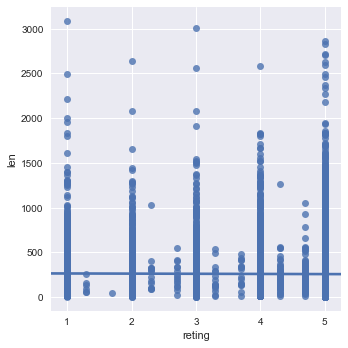

In [31]:
sns.lmplot('reting', 'len', ndf)

Как видим, корреляция практически нулевая. Не будем включать этот признак в модель

In [32]:
ndf.corr()

,sku,categoryLevel1Id,categoryLevel2Id,brandId,reting,hasNegComment,hasPosComment,n_of_exc,len
sku,1.000000,0.130091,0.144730,0.227191,0.018132,-0.021679,-0.021566,-0.014173,-0.012813
categoryLevel1Id,0.130091,1.000000,0.996476,0.069412,-0.050506,0.128762,0.128431,-0.038724,-0.004576
categoryLevel2Id,0.144730,0.996476,1.000000,0.089396,-0.048939,0.128596,0.128264,-0.038575,-0.004640
brandId,0.227191,0.069412,0.089396,1.000000,-0.040000,0.022845,0.022684,-0.013153,0.008064
reting,0.018132,-0.050506,-0.048939,-0.040000,1.000000,0.007585,0.008233,0.072274,-0.009540
hasNegComment,-0.021679,0.128762,0.128596,0.022845,0.007585,1.000000,0.999425,-0.004170,-0.007009
hasPosComment,-0.021566,0.128431,0.128264,0.022684,0.008233,0.999425,1.000000,-0.004154,-0.006859
n_of_exc,-0.014173,-0.038724,-0.038575,-0.013153,0.072274,-0.004170,-0.004154,1.000000,0.004267
len,-0.012813,-0.004576,-0.004640,0.008064,-0.009540,-0.007009,-0.006859,0.004267,1.000000


Теперь построим модель, используя представление TF-IDF Vectorizer (взвешенные частоты вхождений слов и словосочетаний в каждый из документов)

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [160]:
keep = {'reting': [1.0, 2.0, 3.0, 4.0, 5.0]}

newdf = df[df[list(keep)].isin(keep).all(axis=1)]

In [177]:
tfidf = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(newdf['parsed'])

In [178]:
tfidf_features = tfidf.transform(newdf['parsed'])

Для обучения использовались различные модели, но лучшее качество при валидации показали - логистическая регрессия и Support Vector Machine

In [179]:
lr = LogisticRegression().fit(tfidf_features, list(newdf['reting']))

In [180]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [182]:
clf = SVC(C = 1.0, kernel = 'linear')
scores = cross_val_score(clf, tfidf_features, list(newdf['reting']), cv=5)

In [183]:
scores.mean()

0.67166964783130789